# Exploratory Data Analysis

### Imports

In [46]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

BASE_SIMULATION_DIR = 'data/simulations/'
BASE_MEASURE_DIR = 'data/measures/'
C = 'consensus_time'
F = 'opinion_change_frequency'

## Reading CSV files

### Measures

In [162]:
measures_file_list = []
for network in os.listdir(BASE_MEASURE_DIR):
    df = pd.read_csv(BASE_MEASURE_DIR + network, index_col=0)
    df.insert(0, 'type', network.split('.')[0])
    measures_file_list.append(df)
    
measures_df = pd.concat(measures_file_list)

FEATURES = list(measures_df.columns)

In [163]:
measures_df = measures_df.rename_axis(['network'])

In [164]:
measures_df = measures_df[(measures_df['average_shortest_path_lenght'] != np.inf) & (measures_df['closeness'] != np.nan)]
measures_df.describe()

,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,0.124723,0.306941,1445.612743,3.890225,0.199581,-0.027939,0.003352,0.007609
std,0.221348,0.094263,1075.834041,2.151668,0.175515,0.152078,0.000871,0.006254
min,0.008343,0.096122,548.311000,2.095622,0.029795,-0.394020,0.001307,0.003230
25%,0.023910,0.304567,1007.193250,3.013387,0.061138,-0.078335,0.002967,0.005002
50%,0.027664,0.314519,1098.013000,3.195026,0.093410,-0.012530,0.003628,0.005270
75%,0.067528,0.333580,1144.626500,3.288253,0.381908,0.027415,0.004044,0.005572
max,0.652846,0.478556,4797.811000,10.594622,0.621034,0.204217,0.004293,0.027219


### Simulations

In [165]:
simulations_file_list = []
for network in os.listdir(BASE_SIMULATION_DIR):
    df = pd.read_csv(BASE_SIMULATION_DIR + network, index_col=0, header=[0,1])
    # df.insert(0, 'type', network.split('.')[0])
    simulations_file_list.append(df)

simulations_df = pd.concat(simulations_file_list)

In [166]:
simulations_df

random                           \
                                  consensus_time opinion_change_frequency   
waxman_82.edgelist                        772.81                   274.49   
waxman_79.edgelist                        902.50                   279.39   
waxman_25.edgelist                        803.60                   285.37   
waxman_68.edgelist                        760.79                   275.32   
waxman_45.edgelist                        764.85                   269.48   
...                                          ...                      ...   
barabasi_nonlinear_05_70.edgelist         521.70                   257.70   
barabasi_nonlinear_05_5.edgelist          506.26                   271.30   
barabasi_nonlinear_05_10.edgelist         513.14                   261.69   
barabasi_nonlinear_05_57.edgelist         517.88                   259.86   
barabasi_nonlinear_05_33.edgelist         530.02                   259.31   

                                          direct                           \
                                  consensus_time opinion_change_frequency   
waxman_82.edgelist                       1510.22                   243.60   
waxman_79.edgelist                       1743.45                   262.68   
waxman_25.edgelist                       1252.14                   236.12   
waxman_68.edgelist                       1202.76                   250.26   
waxman_45.edgelist                       1253.90                   264.08   
...                                          ...                      ...   
barabasi_nonlinear_05_70.edgelist         606.59                   200.00   
barabasi_nonlinear_05_5.edgelist          606.17                   206.36   
barabasi_nonlinear_05_10.edgelist         621.96                   200.88   
barabasi_nonlinear_05_57.edgelist         622.77                   200.00   
barabasi_nonlinear_05_33.edgelist         623.03                   200.00   

                                         inverse                           
                                  consensus_time opinion_change_frequency  
waxman_82.edgelist                        462.14                   371.60  
waxman_79.edgelist                        431.66                   365.64  
waxman_25.edgelist                        412.48                   352.74  
waxman_68.edgelist                        382.92                   353.18  
waxman_45.edgelist                        377.43                   339.34  
...                                          ...                      ...  
barabasi_nonlinear_05_70.edgelist         384.63                   361.92  
barabasi_nonlinear_05_5.edgelist          400.14                   402.28  
barabasi_nonlinear_05_10.edgelist         405.01                   405.04  
barabasi_nonlinear_05_57.edgelist         420.58                   427.66  
barabasi_nonlinear_05_33.edgelist         397.55                   406.62  

[700 rows x 6 columns]

In [167]:
simulations_df = simulations_df.stack(level=0, future_stack=True).rename_axis(['network','initialization']).reset_index()
simulations_df

,network,initialization,consensus_time,opinion_change_frequency
0,waxman_82.edgelist,random,772.81,274.49
1,waxman_82.edgelist,direct,1510.22,243.60
2,waxman_82.edgelist,inverse,462.14,371.60
3,waxman_79.edgelist,random,902.50,279.39
4,waxman_79.edgelist,direct,1743.45,262.68
...,...,...,...,...
2095,barabasi_nonlinear_05_57.edgelist,direct,622.77,200.00
2096,barabasi_nonlinear_05_57.edgelist,inverse,420.58,427.66
2097,barabasi_nonlinear_05_33.edgelist,random,530.02,259.31
2098,barabasi_nonlinear_05_33.edgelist,direct,623.03,200.00


### Merging and creating the dataset

In [145]:
dataset = measures_df.merge(simulations_df, on='network', how='inner')

In [54]:
from sklearn.preprocessing import LabelEncoder
dataset['groups'] = LabelEncoder().fit_transform(dataset['type'])
dataset.reset_index(inplace=True)

In [76]:
dataset

,network,type,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,initialization,consensus_time,opinion_change_frequency,groups
0,waxman_82.edgelist,waxman,0.025635,0.295991,1196.828,3.392656,0.362602,0.108543,0.003759,0.005682,random,772.81,274.49,6
1,waxman_82.edgelist,waxman,0.025635,0.295991,1196.828,3.392656,0.362602,0.108543,0.003759,0.005682,direct,1510.22,243.60,6
2,waxman_82.edgelist,waxman,0.025635,0.295991,1196.828,3.392656,0.362602,0.108543,0.003759,0.005682,inverse,462.14,371.60,6
3,waxman_25.edgelist,waxman,0.023940,0.294132,1207.612,3.414224,0.292464,0.131139,0.003666,0.005662,random,803.60,285.37,6
4,waxman_25.edgelist,waxman,0.023940,0.294132,1207.612,3.414224,0.292464,0.131139,0.003666,0.005662,direct,1252.14,236.12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,barabasi_nonlinear_05_57.edgelist,barabasi_nonlinear_05,0.028275,0.313281,1104.134,3.207268,0.096775,0.178332,0.003652,0.005233,direct,622.77,200.00,2
1970,barabasi_nonlinear_05_57.edgelist,barabasi_nonlinear_05,0.028275,0.313281,1104.134,3.207268,0.096775,0.178332,0.003652,0.005233,inverse,420.58,427.66,2
1971,barabasi_nonlinear_05_33.edgelist,barabasi_nonlinear_05,0.026015,0.314583,1097.906,3.194812,0.097762,0.177413,0.003639,0.005155,random,530.02,259.31,2
1972,barabasi_nonlinear_05_33.edgelist,barabasi_nonlinear_05,0.026015,0.314583,1097.906,3.194812,0.097762,0.177413,0.003639,0.005155,direct,623.03,200.00,2


### Creating Scaler

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

## Networks Boxplots for each Measure

In [129]:
sns.set_theme(rc={'figure.figsize':(15,6)})

### Clustering
It is possible to see how Watts Strogatz networks presents elevated Clustering Coefficient

<Axes: xlabel='clustering'>

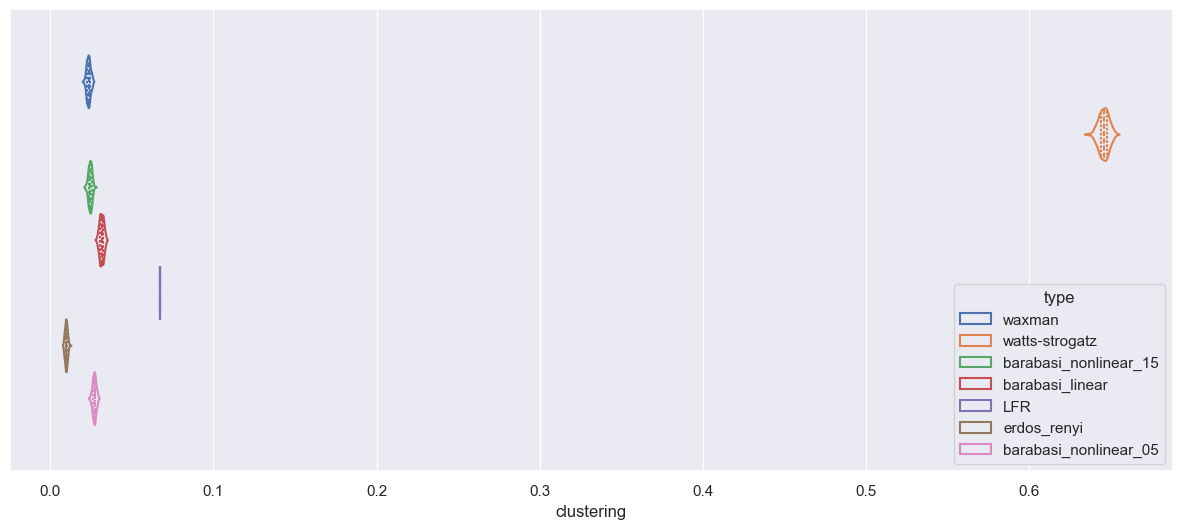

In [131]:
sns.violinplot(
    data=measures_df, 
    x="clustering", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Assortativity
The plot shows Barabasi Non-Linear with $p=1.5$ having negative assortativity, indicating the tendency of nodes to attach to different ones. There is a neutral pattern in Watts-Strogatz, Barabasi-Linear and Erdos Renyi graphs. At last, we see homophily happening with Waxman and Barabasi Non-Linear with $p=0.5$

<Axes: xlabel='assortativity'>

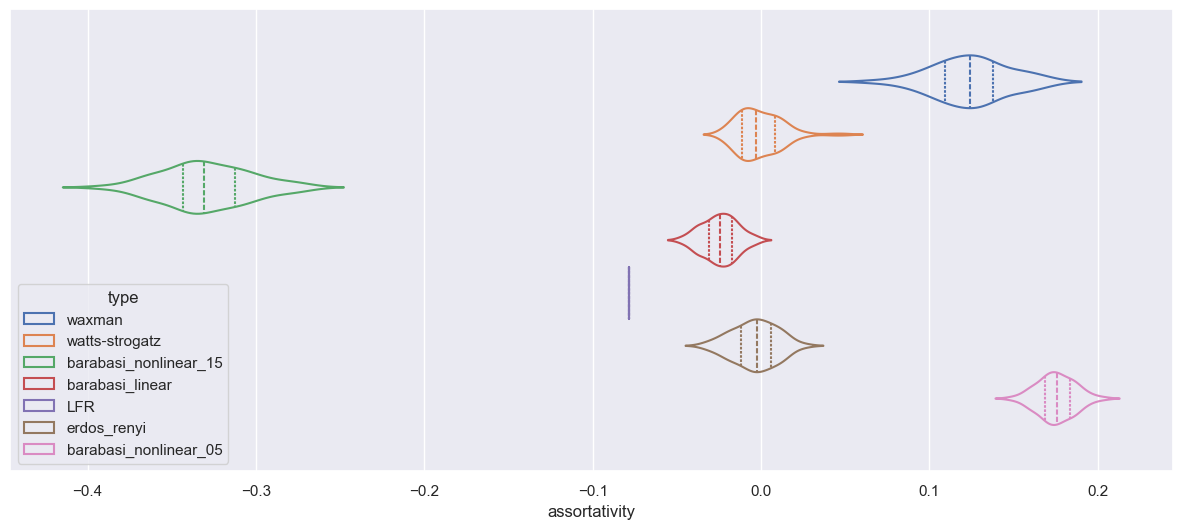

In [130]:
sns.violinplot(
    data=measures_df, 
    x="assortativity", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Closeness
At the extremes of the plot, we can see Watts-Strogatz networks having a smaller amount of central nodes and Barabasi Non-Linear with $p=1.5$ with high amount of central nodes

<Axes: xlabel='closeness'>

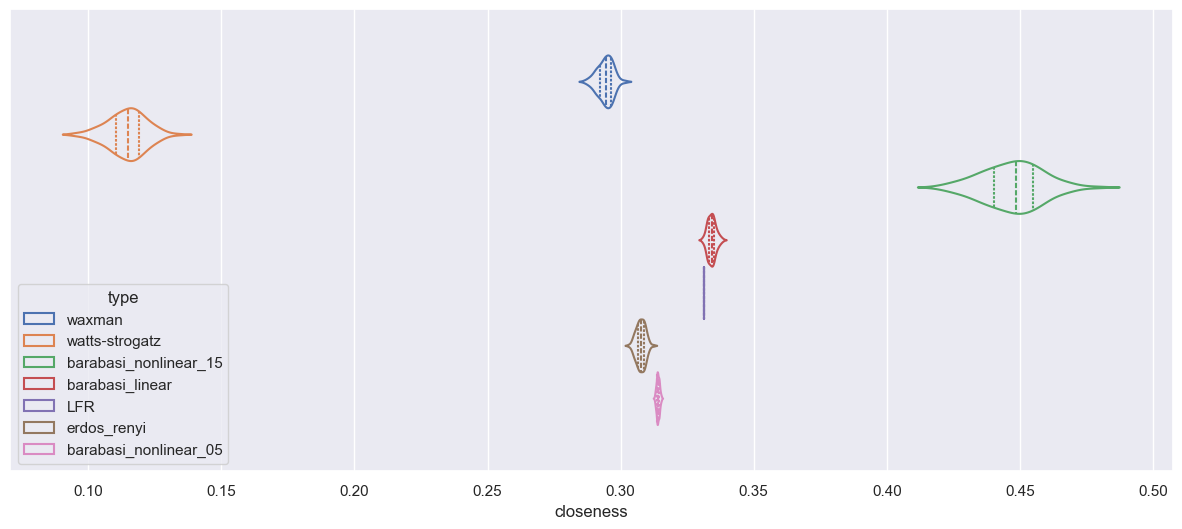

In [128]:
sns.violinplot(
    data=measures_df, 
    x="closeness", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Betweenness

This graph shows clearly the disparity of Watts-Strogatz networks to have higher nodes that are present in Shortest Path Lenghts

<Axes: xlabel='betweenness'>

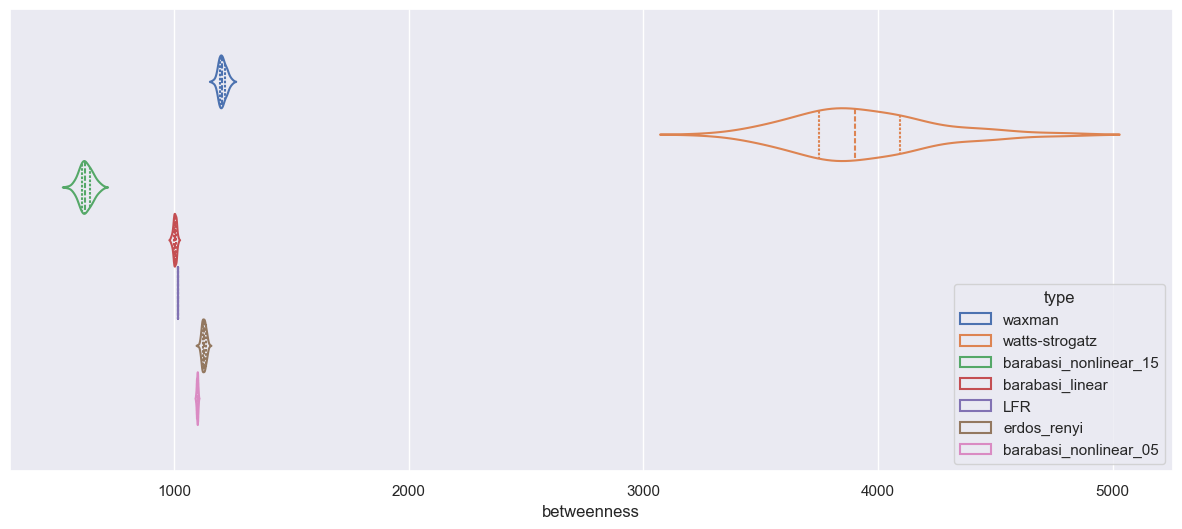

In [141]:
sns.violinplot(
    data=measures_df, 
    x="betweenness", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Average Shortest Path Lenght
Watts-Strogatz is also the networks with higher Average Shortest Path Lenght

<Axes: xlabel='average_shortest_path_lenght'>

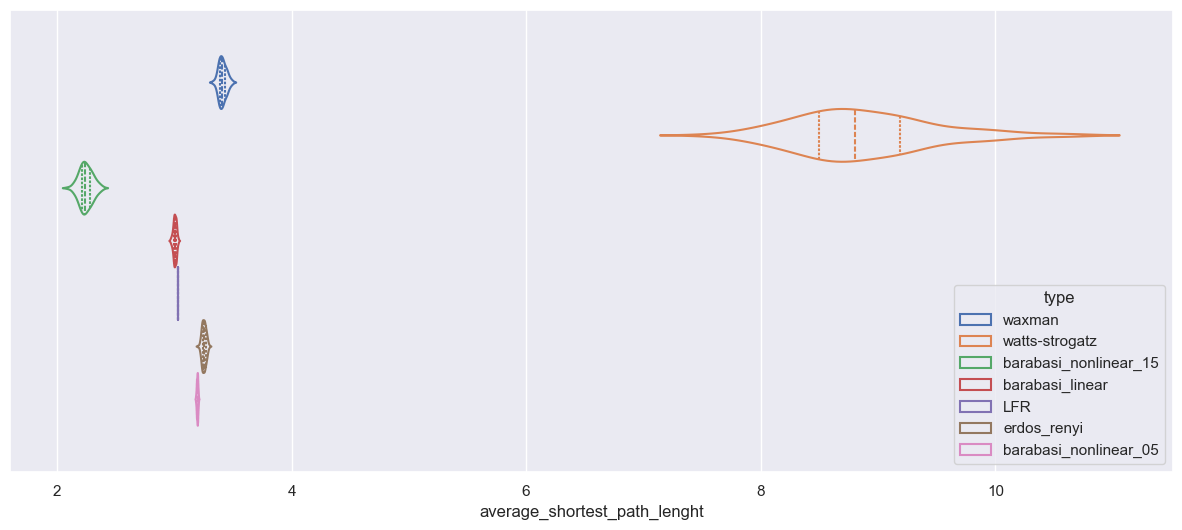

In [134]:
sns.violinplot(
    data=measures_df, 
    x="average_shortest_path_lenght", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Eigenvector

<Axes: xlabel='eigenvector'>

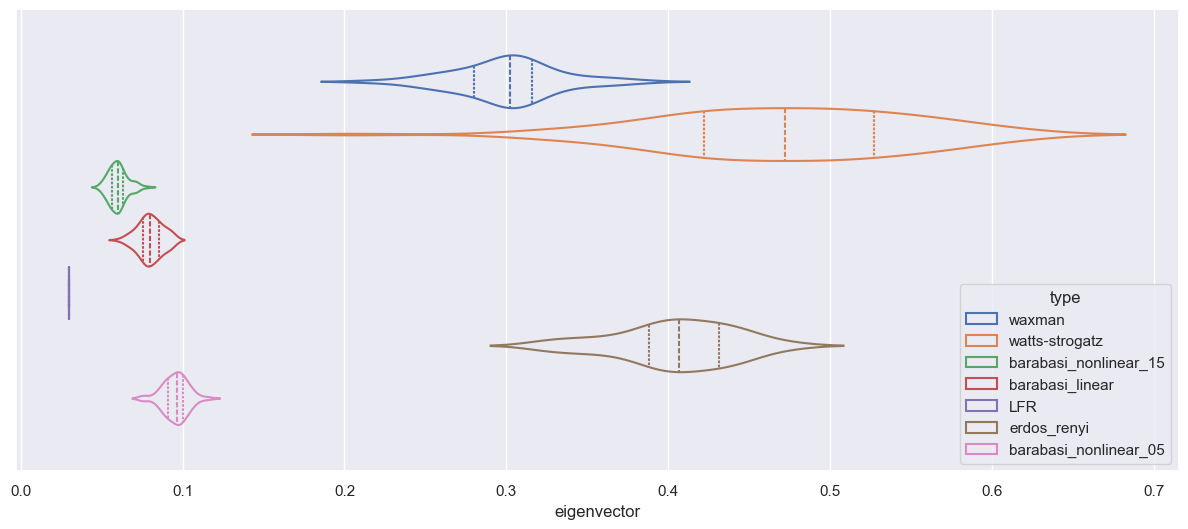

In [135]:
sns.violinplot(
    data=measures_df, 
    x="eigenvector", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Information Centrality
Centralidade de Informacao

<Axes: xlabel='information_centrality'>

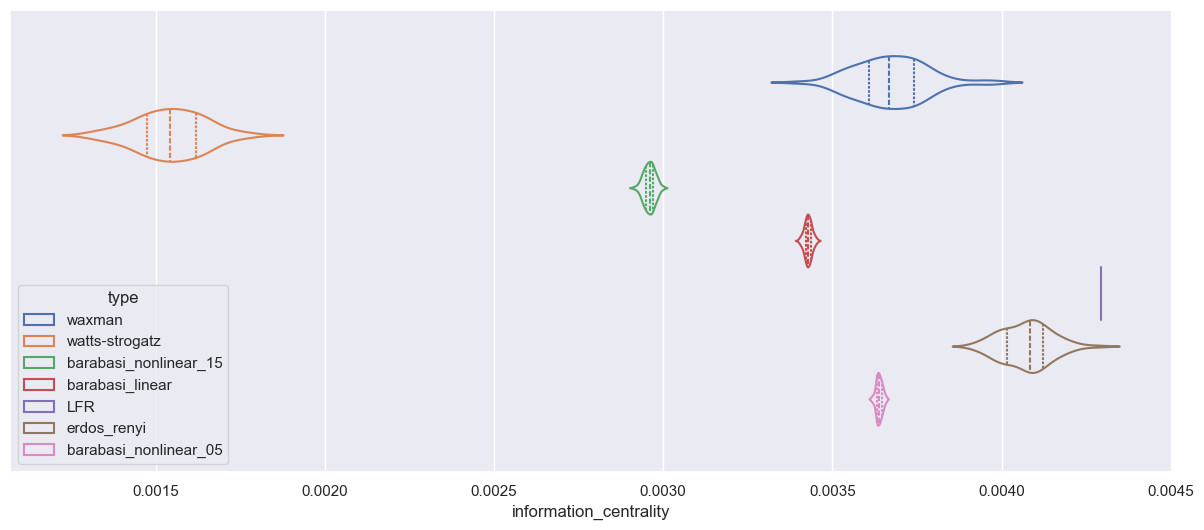

In [138]:
sns.violinplot(
    data=measures_df, 
    x="information_centrality", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Approximate Current Flow Betweenness Centrality

<Axes: xlabel='approximate_current_flow_betweenness_centrality'>

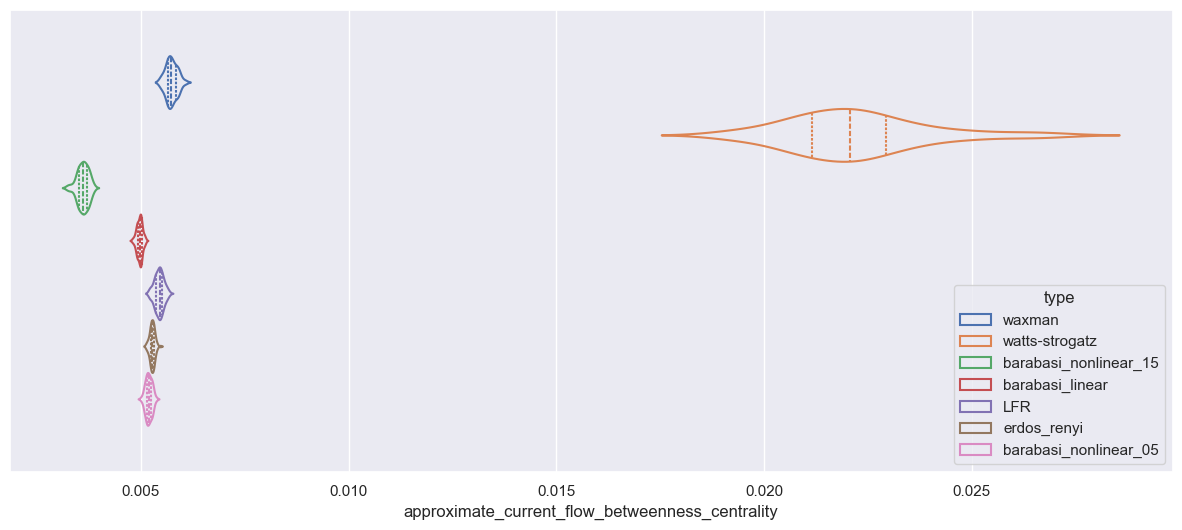

In [139]:
sns.violinplot(
    data=measures_df, 
    x="approximate_current_flow_betweenness_centrality", 
    hue="type", 
    inner='quart',
    fill=False,
)

## Network Metrics for each Initialization

In [144]:
simulations_df

,initialization,consensus_time,opinion_change_frequency
network,,,
waxman_82.edgelist,random,772.81,274.49
waxman_82.edgelist,direct,1510.22,243.60
waxman_82.edgelist,inverse,462.14,371.60
waxman_79.edgelist,random,902.50,279.39
waxman_79.edgelist,direct,1743.45,262.68
...,...,...,...
barabasi_nonlinear_05_57.edgelist,direct,622.77,200.00
barabasi_nonlinear_05_57.edgelist,inverse,420.58,427.66
barabasi_nonlinear_05_33.edgelist,random,530.02,259.31


In [143]:
sns.displot(simulations_df, x="waxman", kind="kde")


ValueError: Could not interpret value `waxman` for `x`. An entry with this name does not appear in `data`.